In [1]:
import os
import requests
import pandas as pd
import yfinance as yf
from dotenv import load_dotenv
import numpy as np
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [2]:
data = yf.download("AGG VTI GLD BTC-USD", start="2015-01-01",
                    end="2021-12-31", group_by='tickers')

[*********************100%***********************]  4 of 4 completed


In [3]:
data.dropna(inplace = True)
data = data[sorted(data.columns)]
data = data.rename(columns=str.lower)
data

agg                                                  \
             adj close       close        high         low        open   
Date                                                                     
2015-01-02   93.438202  110.430000  110.500000  110.180000  110.180000   
2015-01-05   93.641266  110.669998  110.760002  110.480003  110.559998   
2015-01-06   93.878197  110.949997  111.349998  110.889999  110.959999   
2015-01-07   93.861282  110.930000  111.040001  110.739998  111.000000   
2015-01-08   93.717461  110.760002  110.839996  110.629997  110.839996   
...                ...         ...         ...         ...         ...   
2021-12-23  114.199997  114.199997  114.309998  114.070000  114.290001   
2021-12-27  114.260002  114.260002  114.300003  114.129997  114.150002   
2021-12-28  114.209999  114.209999  114.449997  114.169998  114.430000   
2021-12-29  113.870003  113.870003  114.050003  113.809998  113.989998   
2021-12-30  114.120003  114.120003  114.129997  113.830002  113.989998   

                            btc-usd                                            \
               volume     adj close         close          high           low   
Date                                                                            
2015-01-02  2090200.0    315.032013    315.032013    315.838989    313.565002   
2015-01-05  3446200.0    274.473999    274.473999    278.341003    265.084015   
2015-01-06  3688100.0    286.188995    286.188995    287.553009    272.696014   
2015-01-07  3984400.0    294.337006    294.337006    298.753998    283.079010   
2015-01-08  2212200.0    283.348999    283.348999    294.135010    282.174988   
...               ...           ...           ...           ...           ...   
2021-12-23  5506700.0  50784.539062  50784.539062  51332.339844  48065.835938   
2021-12-27  5436800.0  50640.417969  50640.417969  51956.328125  50499.468750   
2021-12-28  5253800.0  47588.855469  47588.855469  50679.859375  47414.210938   
2021-12-29  5933800.0  46444.710938  46444.710938  48119.742188  46201.496094   
2021-12-30  5455400.0  47178.125000  47178.125000  47879.964844  46060.312500   

            ...         gld                                             vti  \
            ...        high         low        open      volume   adj close   
Date        ...                                                               
2015-01-02  ...  114.800003  112.320000  112.489998   7109600.0   93.295891   
2015-01-05  ...  116.000000  114.730003  114.779999   8177400.0   91.692802   
2015-01-06  ...  117.500000  115.800003  116.220001  11238300.0   90.794380   
2015-01-07  ...  116.879997  116.169998  116.470001   6434200.0   91.877777   
2015-01-08  ...  116.870003  115.849998  116.449997   7033700.0   93.498466   
...         ...         ...         ...         ...         ...         ...   
2021-12-23  ...  169.160004  168.009995  168.690002   4551100.0  239.811005   
2021-12-27  ...  169.419998  168.779999  168.960007   4760300.0  242.960007   
2021-12-28  ...  169.649994  168.619995  169.330002   4541900.0  242.460007   
2021-12-29  ...  168.690002  167.279999  167.360001   5889700.0  242.600006   
2021-12-30  ...  169.809998  168.369995  168.429993   5426300.0  242.210007   

                                                                       
                 close        high         low        open     volume  
Date                                                                   
2015-01-02  105.919998  106.720001  105.269997  106.489998  5298300.0  
2015-01-05  104.099998  105.550003  103.860001  105.349998  5383500.0  
2015-01-06  103.080002  104.500000  102.510002  104.400002  4226100.0  
2015-01-07  104.309998  104.449997  103.550003  104.089996  3661500.0  
2015-01-08  106.150002  106.239998  105.110001  105.209999  2796200.0  
...                ...         ...         ...         ...        ...  
2021-12-23  240.669998  241.360001  239.500000  239.869995  2925100.0  
2021-12-27  242.9600

Portfolio A Simulation

In [4]:
MC_portfolio_a_early_career = MCSimulation(portfolio_data = data, weights = [0.1, 0, 0.05, 0.85], num_simulation = 100, num_trading_days = 252*10)

In [5]:
MC_portfolio_a_early_career.calc_cumulative_return()

Running Monte Carlo simulation number 0.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002825,0.995158,1.003017,0.997294,0.990673,0.995871,1.015115,1.002916,1.000770,1.011695,...,1.004605,1.009053,0.998767,1.013825,0.994484,1.012463,0.991604,0.999752,1.012005,0.995520
2,1.010115,1.000073,0.997399,1.005423,0.986798,0.987917,1.009617,0.995046,0.993184,1.013163,...,1.007360,0.998172,1.000884,1.014999,1.007261,1.024925,0.994065,0.987221,1.000059,0.996594
3,1.009539,1.005279,0.993364,1.005635,0.975988,0.985311,1.009513,1.008164,0.996556,1.016720,...,0.999461,1.005101,1.016543,1.006342,1.010695,1.041564,0.993070,0.983067,0.984992,1.002386
4,0.992737,0.988470,0.986508,1.024915,0.971116,0.980429,1.018714,1.006374,0.991798,1.023861,...,0.987750,1.017147,1.008926,1.000879,1.015412,1.040149,0.983306,0.996459,0.985403,1.008483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.909830,2.846809,1.621308,1.886241,3.891042,3.923856,4.340649,2.546239,6.517231,3.274941,...,4.175025,1.752735,1.575957,5.147969,1.621874,2.078278,3.480747,2.309941,1.706537,3.024945
2517,4.964518,2.823388,1.621693,1.865613,3.877665,3.841964,4.263269,2.532840,6.457452,3.255144,...,4.115926,1.743466,1.580827,5.142362,1.628455,2.061580,3.514412,2.309836,1.726645,2.960037
2518,4.981114,2.835485,1.618937,1.888504,3.821956,3.883926,4.300774,2.547344,6.461885,3.212063,...,4.151323,1.756148,1.574694,5.250895,1.633285,2.062467,3.562512,2.288897,1.727232,2.948462
2519,5.029443,2.785015,1.634524,1.889613,3.866938,3.852376,4.285481,2.545517,6.453487,3.257156,...,4.153721,1.762237,1.611456,5.205498,1.646653,2.051338,3.589730,2.314538,1.742154,2.940214


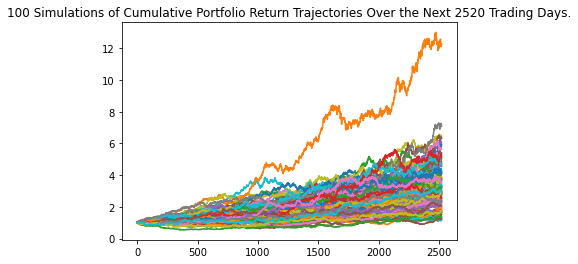

In [6]:
line_plot = MC_portfolio_a_early_career.plot_simulation()

In [7]:
summarize_a_1 = MC_portfolio_a_early_career.summarize_cumulative_return()

print(summarize_a_1)

count           100.000000
mean              3.244820
std               1.612505
min               1.175736
25%               2.147917
50%               2.947876
75%               4.113432
max              12.254591
95% CI Lower      1.245382
95% CI Upper      6.345290
Name: 2520, dtype: float64


In [8]:
MC_portfolio_a_mid_career = MCSimulation(portfolio_data = data, weights = [.2, 0, .05, 0.75], num_simulation = 100, num_trading_days = 252*10)

In [9]:
MC_portfolio_a_mid_career.calc_cumulative_return()
summarize_a_2 = MC_portfolio_a_mid_career.summarize_cumulative_return()

print(summarize_a_2)

Running Monte Carlo simulation number 0.
count           100.000000
mean              2.931666
std               1.170953
min               1.102407
25%               2.064189
50%               2.802850
75%               3.575821
max               6.814816
95% CI Lower      1.147188
95% CI Upper      5.759041
Name: 2520, dtype: float64


In [10]:
MC_portfolio_a_pre_retirement = MCSimulation(portfolio_data = data, weights = [.3, 0 ,.05, 0.65], num_simulation = 100, num_trading_days = 252*10)

In [11]:
MC_portfolio_a_pre_retirement.calc_cumulative_return()
summarize_a_3 = MC_portfolio_a_pre_retirement.summarize_cumulative_return()

print(summarize_a_3)

Running Monte Carlo simulation number 0.
count           100.000000
mean              2.506887
std               0.970875
min               0.878987
25%               1.866960
50%               2.323282
75%               3.013557
max               5.914538
95% CI Lower      1.148474
95% CI Upper      4.855098
Name: 2520, dtype: float64


In [66]:
portfolio_a_result = pd.concat([summarize_a_1, summarize_a_2, summarize_a_3],axis = 1)
portfolio_a_result

,2520,2520,2520
count,100.000000,100.000000,100.000000
mean,3.244820,2.931666,2.506887
std,1.612505,1.170953,0.970875
min,1.175736,1.102407,0.878987
25%,2.147917,2.064189,1.866960
50%,2.947876,2.802850,2.323282
75%,4.113432,3.575821,3.013557
max,12.254591,6.814816,5.914538
95% CI Lower,1.245382,1.147188,1.148474
95% CI Upper,6.345290,5.759041,4.855098


In [70]:
portfolio_a_result.columns = ['Early Career', 'Mid Career', 'Pre Retirement']
portfolio_a_result.insert(0, 'Results', [12,32,398196,8,1,2,3,4,5,6])

ValueError: Length mismatch: Expected axis has 4 elements, new values have 3 elements

In [71]:
portfolio_a_result

,Results,Early Career,Mid Career,Pre Retirement
count,12,100.000000,100.000000,100.000000
mean,32,3.244820,2.931666,2.506887
std,398196,1.612505,1.170953,0.970875
min,8,1.175736,1.102407,0.878987
25%,1,2.147917,2.064189,1.866960
50%,2,2.947876,2.802850,2.323282
75%,3,4.113432,3.575821,3.013557
max,4,12.254591,6.814816,5.914538
95% CI Lower,5,1.245382,1.147188,1.148474
95% CI Upper,6,6.345290,5.759041,4.855098


Portfolio B Simulation

In [13]:
MC_portfolio_b_early_career = MCSimulation(portfolio_data = data, weights = [0.098, 0.02, 0.049, 0.833], num_simulation = 100, num_trading_days = 252*10)

In [14]:
MC_portfolio_b_early_career.calc_cumulative_return()

Running Monte Carlo simulation number 0.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009900,0.999718,0.999311,0.992848,1.011444,1.003222,0.995003,1.004570,0.997172,1.002413,...,1.012719,1.006209,1.003723,0.989429,1.009090,1.014285,1.006870,1.013639,0.998290,1.005757
2,0.993295,0.989162,1.006293,1.001963,1.014840,1.000947,0.997796,1.013562,0.982260,1.015153,...,1.015501,0.989001,0.986695,1.000384,1.016300,1.012205,1.015679,1.005573,0.998460,1.006334
3,0.994371,0.981925,1.014955,1.007197,1.004848,0.984202,1.002695,1.035662,0.975242,1.025044,...,1.018551,0.982624,1.003905,1.011182,1.033088,1.022914,1.029883,0.981253,1.016060,0.997005
4,0.989696,0.963316,1.032280,1.007033,0.996608,0.993850,1.001779,1.032585,0.997704,1.007868,...,1.017873,0.985281,0.984405,0.999992,1.020015,1.024367,1.011367,1.000464,1.025867,1.002474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.969573,1.924725,5.816865,1.933313,1.701063,1.611079,3.866221,3.374168,2.708468,1.576983,...,6.610783,2.167174,1.931209,1.951133,4.000616,2.979500,3.835141,2.893750,2.247127,3.123283
2517,3.978848,1.955700,5.873379,1.958473,1.722746,1.581523,3.867196,3.422763,2.749559,1.589487,...,6.510259,2.184604,1.956721,1.928785,4.023819,2.992538,3.896456,2.869350,2.243287,3.122564
2518,3.964719,1.915726,5.860030,1.963647,1.749186,1.557133,3.842691,3.394820,2.737906,1.580232,...,6.669600,2.206566,1.964407,1.923052,4.082512,2.982570,3.955991,2.849987,2.245370,3.165606
2519,3.964928,1.919464,5.833822,1.954656,1.770618,1.547997,3.804532,3.411022,2.754391,1.576381,...,6.620180,2.221405,1.948832,1.909610,4.050361,2.997137,4.001765,2.851881,2.235518,3.145430


In [15]:
summarize_b_1 = MC_portfolio_b_early_career.summarize_cumulative_return()
print(summarize_b_1)

count           100.000000
mean              3.803634
std               2.597800
min               1.185624
25%               2.346196
50%               3.186152
75%               4.386585
max              22.083810
95% CI Lower      1.415346
95% CI Upper      8.954507
Name: 2520, dtype: float64


In [16]:
MC_portfolio_b_mid_career = MCSimulation(portfolio_data = data, weights = [0.197, 0.015, 0.04925, 0.73875], num_simulation = 100, num_trading_days = 252*10)

In [17]:
MC_portfolio_b_mid_career.calc_cumulative_return()

Running Monte Carlo simulation number 0.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000412,0.997826,1.003260,0.998951,1.002596,1.004568,0.992208,0.986349,1.004568,1.007108,...,0.978061,0.998935,1.019889,1.006862,0.988318,1.000087,1.008338,1.010824,0.990808,0.990873
2,0.989364,0.999014,0.998972,0.999217,1.001786,1.004508,0.992235,0.987164,1.009399,1.001219,...,0.986930,1.009173,1.023053,0.999613,0.990264,1.006264,1.005281,1.012747,0.992497,0.985413
3,0.985045,1.010366,0.990835,0.998505,1.006754,1.005848,1.009330,0.991977,1.008432,0.991028,...,0.990663,1.002833,1.008989,1.011084,0.991888,1.003699,1.002527,1.015390,1.000275,1.000748
4,0.989677,0.998020,1.004056,0.986991,1.013509,0.999637,1.003152,0.991311,1.001564,0.993400,...,0.986599,0.999361,1.029960,1.016617,0.990820,0.997029,0.990691,1.017026,1.001543,0.995909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.336211,4.357447,4.011517,3.394220,4.212771,3.932110,3.057620,5.392526,2.035499,1.609983,...,1.008045,3.272635,2.062449,2.430797,2.918615,3.804685,2.239924,4.434464,1.869439,3.951930
2517,4.295809,4.401376,4.050427,3.412908,4.197336,3.936945,3.060992,5.465697,2.041496,1.591399,...,1.006448,3.289463,2.089705,2.421150,2.932773,3.804615,2.250337,4.414148,1.866088,3.980422
2518,4.248950,4.353924,4.031871,3.433928,4.165612,3.971978,3.015364,5.485720,2.082324,1.573275,...,0.995769,3.279873,2.102393,2.429900,2.931525,3.894339,2.270315,4.461880,1.883937,4.010744
2519,4.260332,4.326419,4.025694,3.456401,4.148910,3.998969,3.055691,5.416011,2.093709,1.575947,...,0.998330,3.261390,2.113080,2.443980,2.945588,3.939641,2.261942,4.442086,1.892922,4.058895


In [18]:
summarize_b_2 = MC_portfolio_b_mid_career.summarize_cumulative_return()
print(summarize_b_2)

count           100.000000
mean              3.293651
std               1.236224
min               1.019259
25%               2.419286
50%               3.199161
75%               4.040791
max               9.199515
95% CI Lower      1.513165
95% CI Upper      5.720035
Name: 2520, dtype: float64


In [19]:
MC_portfolio_b_pre_retirement = MCSimulation(portfolio_data = data, weights = [.297, 0.01 ,.0495, 0.6435], num_simulation = 100, num_trading_days = 252*10)

In [20]:
summarize_b_3 = MC_portfolio_b_pre_retirement.summarize_cumulative_return()
print(summarize_b_3)

Running Monte Carlo simulation number 0.
count           100.000000
mean              2.840984
std               1.264908
min               1.056595
25%               2.070243
50%               2.650553
75%               3.373244
max               9.213927
95% CI Lower      1.241606
95% CI Upper      5.148703
Name: 2520, dtype: float64


Portfolio C Simulation

In [21]:
MC_portfolio_c_early_career = MCSimulation(portfolio_data = data, weights = [0.095, 0.05, 0.0475, 0.8075], num_simulation = 100, num_trading_days = 252*10)

In [22]:
MC_portfolio_c_early_career.calc_cumulative_return()

Running Monte Carlo simulation number 0.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004106,1.000580,0.975954,0.999748,1.012324,0.986080,0.998519,0.988376,0.994967,0.994682,...,0.992086,0.998457,0.995695,0.988474,0.999993,0.995071,1.001662,0.979866,0.999169,1.008924
2,0.999239,1.002347,0.963634,1.010810,1.007544,0.987810,1.003265,0.994166,0.985947,0.986562,...,0.998680,1.009270,0.986357,0.977435,1.009039,0.997941,1.014265,0.977624,0.999989,0.997188
3,1.008529,1.001340,0.957416,1.012786,1.006699,1.000708,0.999973,0.993989,0.993676,0.990763,...,0.996606,1.011403,0.994037,0.963825,1.030236,0.986118,1.012966,0.980487,1.003321,0.987453
4,1.004521,0.991242,0.964948,1.019461,0.994574,1.001890,0.992971,0.989122,0.994750,0.986039,...,0.981222,1.008699,0.984138,0.964571,1.039340,1.001381,1.012832,0.987093,1.007494,0.982458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,6.602964,2.370577,4.698612,6.911139,5.511474,3.013695,3.599059,4.801737,6.519730,1.782167,...,5.598071,2.116012,2.529302,5.795828,1.954370,4.261738,6.106324,1.968191,3.286078,5.889926
2517,6.533062,2.361782,4.707109,6.876558,5.503356,3.032989,3.634969,4.834860,6.492281,1.780486,...,5.632060,2.147030,2.526978,5.752437,1.960123,4.244233,6.090385,1.958535,3.255061,5.915146
2518,6.495511,2.349659,4.837505,6.814567,5.458480,3.080721,3.681223,4.764319,6.523748,1.784520,...,5.608908,2.141048,2.512760,5.711980,1.955427,4.303758,6.035071,1.986347,3.217401,5.862222
2519,6.584260,2.351988,4.852862,6.842273,5.439489,3.094054,3.708265,4.760541,6.460834,1.780127,...,5.644761,2.131485,2.498193,5.685501,1.938693,4.321030,5.990397,2.005107,3.189630,5.888360


In [23]:
summarize_c_1 = MC_portfolio_c_early_career.summarize_cumulative_return()
print(summarize_c_1)

count           100.000000
mean              4.570520
std               2.026397
min               1.440396
25%               3.104942
50%               4.270215
75%               5.663340
max              10.741429
95% CI Lower      1.828756
95% CI Upper      9.350877
Name: 2520, dtype: float64


In [24]:
MC_portfolio_c_mid_career = MCSimulation(portfolio_data = data, weights = [0.194, 0.03, 0.0485, 0.7275], num_simulation = 100, num_trading_days = 252*10)

In [25]:
MC_portfolio_c_mid_career.calc_cumulative_return()

Running Monte Carlo simulation number 0.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006306,1.004504,1.015864,1.014916,1.010343,0.994343,1.003983,0.986870,0.994569,0.999122,...,0.996453,1.007403,1.003826,0.983974,0.997431,0.991986,1.002659,0.992231,1.001023,1.004086
2,1.014157,1.005064,1.002735,1.008082,0.994397,1.000387,0.995787,0.992526,0.987143,0.994888,...,0.999761,0.998207,0.992223,0.990257,1.001741,0.984102,1.004007,0.982117,1.012263,0.996117
3,1.017260,0.995697,1.015984,1.024258,0.992181,0.990330,0.999550,0.991238,1.005251,1.001191,...,1.004573,0.999248,0.991638,0.993718,0.997674,0.983027,1.010454,0.991296,1.023267,0.998758
4,1.023345,0.990880,1.014291,1.025367,0.996245,1.001366,0.991166,0.981717,1.002777,1.009858,...,1.005963,1.005198,0.979216,0.985432,1.005804,0.984270,1.018657,1.003099,1.016652,1.002730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.009863,5.216345,5.651278,2.097641,3.522973,3.982471,3.672010,2.449307,4.469502,6.390356,...,3.251256,1.783382,3.313794,2.372041,1.809638,4.694213,2.940200,4.983931,10.847902,1.785175
2517,4.027726,5.150057,5.620516,2.090144,3.526810,3.959718,3.696970,2.457706,4.484311,6.329478,...,3.255650,1.795714,3.272182,2.398633,1.806129,4.653300,2.931548,5.010706,10.959424,1.809750
2518,4.041954,5.151397,5.649842,2.070307,3.513853,3.938145,3.702306,2.436749,4.423604,6.312642,...,3.235336,1.777753,3.294879,2.392545,1.812541,4.619594,2.915703,5.021750,10.818957,1.804453
2519,3.998382,5.092477,5.662788,2.057025,3.515715,3.900624,3.724358,2.464602,4.453916,6.324984,...,3.202622,1.790200,3.305375,2.361164,1.820013,4.614296,2.905246,4.988534,10.805544,1.826189


In [26]:
summarize_c_2 = MC_portfolio_c_mid_career.summarize_cumulative_return()
print(summarize_c_2)

count           100.000000
mean              3.862672
std               1.744954
min               1.383910
25%               2.522250
50%               3.539876
75%               4.607576
max              10.897142
95% CI Lower      1.610539
95% CI Upper      8.202729
Name: 2520, dtype: float64


In [27]:
MC_portfolio_c_pre_retirement = MCSimulation(portfolio_data = data, weights = [0.294, 0.02, 0.049, 0.637], num_simulation = 100, num_trading_days = 252*10)

In [28]:
MC_portfolio_c_pre_retirement.calc_cumulative_return()

Running Monte Carlo simulation number 0.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005235,0.999590,1.008382,1.005920,1.004622,1.009936,1.006186,0.988383,1.004512,1.000342,...,1.005710,1.010851,0.996776,1.000380,1.002652,0.998583,1.000792,1.000120,1.003596,0.987009
2,1.004467,1.011229,1.009996,1.003625,1.009853,1.016649,0.997234,0.987786,1.003639,0.994277,...,0.988491,1.012710,1.001418,0.992125,0.998008,1.004592,1.006973,1.000104,1.010785,0.986227
3,1.011997,1.006707,1.017994,1.011749,1.011321,1.011581,0.994366,0.997393,0.984650,0.987236,...,0.991817,0.993221,1.008411,0.989927,0.999915,1.016662,1.005121,1.002614,1.000783,0.966308
4,1.001959,1.007509,1.001693,1.004855,1.002732,1.012959,0.992835,0.992445,0.988709,0.984486,...,1.002152,1.004013,1.004964,0.991959,1.002503,1.009735,1.006930,1.001717,1.004453,0.974308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.630516,2.216077,4.336697,3.543131,4.213505,2.894208,3.411423,3.467481,2.099461,2.589338,...,4.794937,1.727552,2.792278,2.794891,6.665400,5.986836,3.123284,1.936368,2.416047,2.752491
2517,2.623655,2.198920,4.332634,3.566836,4.186831,2.878181,3.398366,3.471437,2.094777,2.577057,...,4.745671,1.742105,2.845492,2.807352,6.594816,5.929213,3.076122,1.937146,2.432109,2.754429
2518,2.630776,2.176040,4.379301,3.550586,4.173957,2.881795,3.360256,3.441804,2.088613,2.593412,...,4.682276,1.744288,2.844295,2.781270,6.636101,5.937220,3.066345,1.928868,2.427311,2.727145
2519,2.609995,2.164177,4.490020,3.549264,4.146471,2.871497,3.360701,3.466728,2.062451,2.583863,...,4.734314,1.734631,2.813766,2.747675,6.661464,5.855184,3.114861,1.900620,2.415164,2.727835


In [29]:
summarize_c_3 = MC_portfolio_c_pre_retirement.summarize_cumulative_return()
print(summarize_c_3)

count           100.000000
mean              3.054775
std               1.085028
min               1.020965
25%               2.303950
50%               2.840253
75%               3.627577
max               6.637369
95% CI Lower      1.532241
95% CI Upper      5.799809
Name: 2520, dtype: float64


Portfolio D Simulation

In [30]:
MC_portfolio_d_early_career = MCSimulation(portfolio_data = data, weights = [0.09, 0.1, 0.045, 0.765], num_simulation = 100, num_trading_days = 252*10)

In [31]:
MC_portfolio_d_early_career.calc_cumulative_return()

Running Monte Carlo simulation number 0.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001833,1.002451,0.996309,0.979709,0.996697,1.007525,1.025790,1.003372,0.998217,0.989325,...,0.973551,0.996315,1.015002,0.989099,0.972126,1.014137,0.984638,1.000713,0.996878,0.992090
2,0.999356,1.009538,0.983250,0.980203,0.996704,1.010279,1.027522,0.999233,1.002347,0.994798,...,0.957697,1.005745,1.006797,0.993506,0.982017,1.009308,1.003102,1.002166,0.987329,0.997155
3,1.006142,1.006958,0.968232,0.978596,0.995546,1.020912,1.013728,0.999925,1.014262,1.009505,...,0.958780,1.011150,1.009178,0.999779,0.986965,1.004285,0.995683,1.005170,0.985439,0.994899
4,0.995973,1.015517,0.967262,0.967253,0.969517,1.023705,1.017687,0.995744,1.002540,0.994823,...,0.968020,1.016007,0.998497,1.002226,1.002632,1.004417,0.996400,1.008654,0.979105,0.995843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,10.941459,10.641310,3.041507,3.280728,6.899062,8.236607,7.518572,2.893367,7.292598,8.445502,...,3.580982,3.797268,9.511204,2.820367,4.461817,8.166598,3.290226,12.496808,11.461671,8.433682
2517,10.804140,10.543209,2.991226,3.250491,6.964576,8.284176,7.426227,2.858234,7.261095,8.465143,...,3.607548,3.772617,9.603362,2.792480,4.356888,8.211046,3.354749,12.614449,11.493315,8.504540
2518,10.766270,10.631203,2.933906,3.282290,6.900812,8.177886,7.437719,2.889050,7.145415,8.578454,...,3.666204,3.868320,9.621775,2.787449,4.380559,8.277808,3.337124,12.618520,11.509075,8.496236
2519,10.708045,10.805037,2.896973,3.295572,6.964376,8.221478,7.476155,2.936297,7.146683,8.545181,...,3.742923,3.850282,9.810291,2.804239,4.397074,8.231860,3.298930,12.570916,11.515110,8.400525


In [32]:
summarize_d_1 = MC_portfolio_d_early_career.summarize_cumulative_return()
print(summarize_d_1)

count           100.000000
mean              7.357077
std               3.157018
min               2.677784
25%               5.049417
50%               6.942319
75%               9.154961
max              18.643524
95% CI Lower      2.942488
95% CI Upper     13.721820
Name: 2520, dtype: float64


In [33]:
MC_portfolio_d_mid_career = MCSimulation(portfolio_data = data, weights = [0.185, 0.075, 0.04625, 0.69375], num_simulation = 100, num_trading_days = 252*10)

In [34]:
MC_portfolio_d_mid_career.calc_cumulative_return()

Running Monte Carlo simulation number 0.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998059,1.005988,0.997584,1.009497,0.994063,1.020282,0.995257,0.995121,1.002863,0.985007,...,0.994819,0.988628,1.001658,0.993442,1.007774,0.993748,1.010837,0.990323,1.006537,1.006919
2,1.002954,0.996667,0.995962,1.005631,0.999334,1.023452,1.002731,0.995797,1.000159,0.986046,...,0.995576,0.991236,0.976180,0.996194,1.015719,0.977442,1.014999,0.989859,1.023544,1.002220
3,1.007925,0.987199,0.988301,0.999267,1.009796,1.028173,1.001054,0.992300,0.988737,0.988603,...,1.007085,0.986629,0.984770,0.995867,1.012513,0.968329,1.020449,1.000612,1.014608,0.993454
4,0.995198,0.983406,0.982892,1.007609,1.002037,1.042089,1.011333,0.982048,0.986079,0.979354,...,1.022215,0.991374,0.972377,0.999789,1.003283,0.965267,1.041454,1.004675,0.995294,1.008995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,10.720297,5.696838,5.212692,4.813352,4.609129,4.950830,10.505558,7.698805,5.528635,5.696099,...,11.489528,6.249075,8.184392,5.883474,6.582105,4.944078,5.090792,2.153625,1.986260,8.658289
2517,10.722770,5.738945,5.235421,4.821674,4.589631,5.003406,10.420410,7.683488,5.569827,5.690398,...,11.488851,6.268332,8.270215,5.930007,6.665071,4.910030,5.047819,2.175843,1.968132,8.599661
2518,10.767816,5.675593,5.168160,4.801224,4.600252,4.938566,10.412623,7.664469,5.548952,5.649163,...,11.563316,6.287033,8.282546,5.854518,6.651843,4.953217,4.992128,2.168384,1.958287,8.559577
2519,10.806390,5.637273,5.130606,4.752936,4.620034,5.008597,10.489758,7.649318,5.594887,5.701633,...,11.567688,6.260954,8.193436,5.820475,6.602842,5.017561,5.007193,2.187694,1.959596,8.687115


In [35]:
summarize_d_2 = MC_portfolio_d_mid_career.summarize_cumulative_return()
print(summarize_d_2)

count           100.000000
mean              5.286116
std               2.386866
min               1.612693
25%               3.734036
50%               4.942681
75%               6.272800
max              16.891411
95% CI Lower      2.066767
95% CI Upper     10.709109
Name: 2520, dtype: float64


In [36]:
MC_portfolio_d_pre_retirement = MCSimulation(portfolio_data = data, weights = [0.285, 0.05, 0.0475, 0.6175], num_simulation = 100, num_trading_days = 252*10)

In [37]:
MC_portfolio_d_pre_retirement.calc_cumulative_return()

Running Monte Carlo simulation number 0.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989180,1.002731,1.000563,0.987409,1.010529,0.996155,0.996254,0.982247,0.995865,0.996000,...,1.006257,0.996008,0.977156,1.000261,1.005571,1.001707,1.015251,1.004911,1.002507,1.002364
2,0.985474,1.015173,1.001619,0.996761,1.008731,1.003889,1.005092,0.989446,0.995126,0.995197,...,1.022471,1.004728,0.978510,1.009690,1.011171,1.003804,1.019637,1.017278,1.008528,1.005539
3,0.979222,1.020087,0.993034,0.991377,1.009908,1.011223,1.013819,0.991765,0.999879,0.996372,...,1.012146,1.014235,0.974601,1.009819,1.005092,1.006207,1.018213,1.020268,1.001998,1.003762
4,0.978852,1.023771,0.998668,0.989404,1.015622,1.012158,1.018752,0.996186,1.000669,1.002367,...,1.013260,1.023247,0.961118,1.011416,1.019725,1.021093,1.015962,1.019802,1.015830,1.009421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.912448,2.639311,4.804520,2.970817,3.381285,2.736044,4.390848,1.684405,3.107534,3.559773,...,3.540861,3.721766,2.426229,3.891289,3.778770,4.383764,2.293558,2.301578,3.232671,3.645085
2517,3.982549,2.651448,4.814964,2.934643,3.358712,2.713250,4.376746,1.697716,3.105481,3.577732,...,3.534844,3.697486,2.456298,3.922494,3.786294,4.398822,2.298363,2.289193,3.219740,3.695566
2518,3.963286,2.672896,4.875626,2.943583,3.344216,2.686384,4.348667,1.706341,3.104645,3.536170,...,3.515757,3.733974,2.435133,3.886886,3.786919,4.415815,2.282383,2.305671,3.232774,3.641826
2519,3.998428,2.654516,4.928116,2.924581,3.336607,2.672390,4.412126,1.712783,3.104805,3.537269,...,3.535464,3.734613,2.418296,3.885739,3.760335,4.425542,2.259912,2.302220,3.230894,3.629387


In [38]:
summarize_d_3 = MC_portfolio_d_mid_career.summarize_cumulative_return()
print(summarize_d_3)

count           100.000000
mean              5.286116
std               2.386866
min               1.612693
25%               3.734036
50%               4.942681
75%               6.272800
max              16.891411
95% CI Lower      2.066767
95% CI Upper     10.709109
Name: 2520, dtype: float64
